<a href="https://colab.research.google.com/github/Bellinimarcos-prog/causalidade-em-ia/blob/main/Antes_de_darmos_este_proximo_passo_vc_teria_a_cap_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sim, com certeza! Utilizando Python e bibliotecas como `matplotlib` e, para visualizações 3D mais complexas, `mayavi` ou `plotly`, posso criar representações visuais dos microtúbulos, do conjunto BEC-microtúbulos ou de partes do aparato experimental.

**1. Representação 2D de Microtúbulos:**

Podemos começar com uma representação 2D simplificada dos microtúbulos como cilindros ou linhas paralelas.

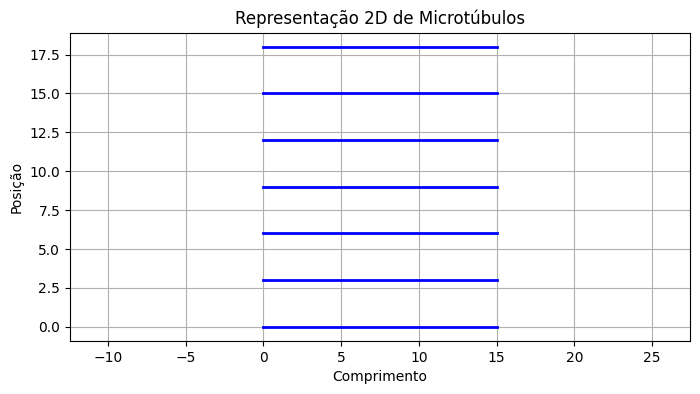

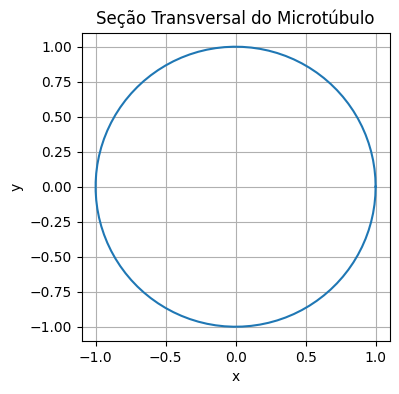

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def desenhar_microtubulos_2d(num_microtubulos=5, comprimento=10, espacamento=2):
    """Desenha microtúbulos 2D como linhas paralelas."""
    plt.figure(figsize=(8, 4))
    for i in range(num_microtubulos):
        plt.plot([0, comprimento], [i * espacamento, i * espacamento], 'b-', linewidth=2)  # Linhas azuis
    plt.xlabel("Comprimento")
    plt.ylabel("Posição")
    plt.title("Representação 2D de Microtúbulos")
    plt.axis('equal') # Para manter a proporção correta
    plt.grid(True)
    plt.show()

# Exemplo de uso:
desenhar_microtubulos_2d(num_microtubulos=7, comprimento=15, espacamento=3)

def desenhar_microtubulo_secao(raio=1, num_pontos=100):
  """Desenha a seção transversal de um microtubulo."""
  theta = np.linspace(0, 2*np.pi, num_pontos)
  x = raio * np.cos(theta)
  y = raio * np.sin(theta)
  plt.figure(figsize=(4,4))
  plt.plot(x, y)
  plt.gca().set_aspect('equal')
  plt.title("Seção Transversal do Microtúbulo")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.show()

desenhar_microtubulo_secao()

Este código gera:

*   Um conjunto de linhas paralelas representando os microtúbulos.
*   Um círculo representando a seção transversal de um microtúbulo.

Podemos modificar os parâmetros `num_microtubulos`, `comprimento` e `espacamento` para ajustar a representação.

**2. Representação 3D de Microtúbulos (usando `mayavi` ou `plotly`):**

Para uma visualização 3D mais realista, podemos usar bibliotecas como `mayavi` (que requer instalação separada) ou `plotly` (que é mais facilmente integrada ao Colab).

*   **Usando `plotly` (mais recomendado para o Colab):**

In [2]:
import plotly.graph_objects as go
import numpy as np

def desenhar_microtubulos_3d(num_microtubulos=5, comprimento=10, raio=0.5, espacamento=2):
    """Desenha microtúbulos 3D como cilindros."""
    fig = go.Figure()
    for i in range(num_microtubulos):
        z = np.linspace(i * espacamento, i * espacamento + comprimento, 50)
        x = np.zeros_like(z)
        y = np.zeros_like(z)
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=5, color='blue')))

    fig.update_layout(scene=dict(aspectmode='data'), title="Representação 3D de Microtúbulos")
    fig.show()

desenhar_microtubulos_3d()

In [4]:
import plotly.graph_objects as go
import numpy as np

def desenhar_bec_microtubulos_3d_melhorado(num_microtubulos=3, comprimento=10, raio_mt=0.3, espacamento=2, raio_bec=1.5):
    fig = go.Figure()

    # BEC (nuvem gaussiana - simplificada)
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_bec = raio_bec * np.outer(np.cos(u), np.sin(v))
    y_bec = raio_bec * np.outer(np.sin(u), np.sin(v))
    z_bec = raio_bec * np.outer(np.ones_like(u), np.cos(v))
    fig.add_trace(go.Surface(x=x_bec, y=y_bec, z=z_bec, colorscale='Viridis', opacity=0.7, name="BEC"))

    # Microtúbulos (cilindros)
    for i in range(num_microtubulos):
      z = np.linspace(raio_bec, raio_bec+comprimento, 50) # Inicia no topo do BEC
      x = np.full_like(z, i * espacamento - (num_microtubulos-1)*espacamento/2) # Centraliza os microtubulos
      y = np.zeros_like(z)
      fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=4, color='blue'), name=f"Microtúbulo {i+1}"))

    fig.update_layout(scene=dict(aspectmode='data'), title="BEC e Microtúbulos em 3D (Melhorado)")
    fig.show()

desenhar_bec_microtubulos_3d_melhorado()

Este código gera uma visualização 3D de cilindros representando os microtúbulos.

**3. Representação do Conjunto BEC-Microtúbulos:**

Podemos combinar as representações acima para mostrar o BEC e os microtúbulos juntos. O BEC pode ser representado como uma esfera ou uma nuvem gaussiana.

In [3]:
import plotly.graph_objects as go
import numpy as np

def desenhar_bec_microtubulos_3d(num_microtubulos=5, comprimento=10, raio_mt=0.5, espacamento=2, raio_bec=2):
    """Desenha o BEC como uma esfera e os microtúbulos como cilindros."""
    fig = go.Figure()

    # Desenha os microtúbulos
    for i in range(num_microtubulos):
        z = np.linspace(i * espacamento, i * espacamento + comprimento, 50)
        x = np.zeros_like(z)
        y = np.zeros_like(z)
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=5, color='blue')))

    # Desenha o BEC como uma esfera
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = raio_bec * np.outer(np.cos(u), np.sin(v))
    y = raio_bec * np.outer(np.sin(u), np.sin(v))
    z = raio_bec * np.outer(np.ones_like(u), np.cos(v))
    fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='Viridis', opacity=0.5))

    fig.update_layout(scene=dict(aspectmode='data'), title="BEC e Microtúbulos em 3D")
    fig.show()

desenhar_bec_microtubulos_3d()

**4. Representação Esquemática do Aparato:**

Para uma representação mais completa do aparato, precisaríamos de mais detalhes sobre o design experimental. No entanto, posso criar um esquema simplificado mostrando os principais componentes:

*   Câmara de vácuo
*   BEC
*   Microtúbulos
*   Feixes de laser
*   Lentes/Espelhos

Usando `matplotlib.patches` ou outras ferramentas de desenho, podemos criar um diagrama 2D representando esses componentes.

**Próximos Passos:**

Para criar visualizações mais precisas e relevantes para o nosso trabalho, preciso de mais informações sobre:

*   O número e o comprimento dos microtúbulos.
*   O raio do BEC.
*   O posicionamento relativo dos microtúbulos e do BEC.
*   O esquema óptico (direção dos lasers, posição das lentes, etc.).

Com essas informações, posso gerar visualizações mais detalhadas e úteis para o artigo. Qual representação você gostaria de priorizar?